In [2]:
import numpy as np
import IPython
import librosa

from scipy import signal as sp
from scipy.io import wavfile
from math import pi
from scipy.fftpack import fft
from scipy.fftpack import fftshift
from scipy.interpolate import interp1d as itp
import math

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import sounddevice as sd
from scipy.io.wavfile import write

%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 24})

def plot_signal(x, xaxis_label=None,yaxis_label=None, save=None):
    plt.plot(x)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    
    if save:
        plt.savefig(save + '.pdf', format='pdf')
    
    return




In [3]:
#FOR ALL PROBLEMS a=3

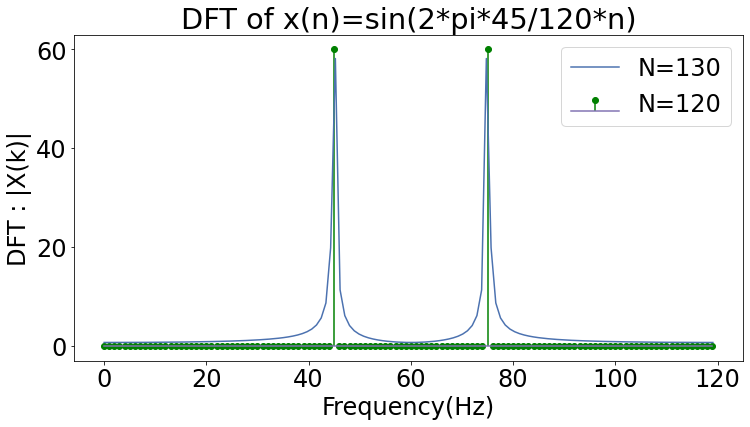

In [83]:
#Problem 1
def DFT(xn):
    N = len(xn)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, xn)
    return X
#1
Fs=120;F=45
n1=np.linspace(0,119,num=120)
xn1= 1*np.sin(2*np.pi*(F/Fs)*n1)
#plt.stem(n,xn)
Xdft1= DFT(xn1)
N1 = len(Xdft1)
n1 = np.arange(N1)
T1 = N1/120
freq1 = n1/T1 



#2
Fs=120;F=45
n2=np.linspace(0,129,num=130)
xn2= 1*np.sin(2*np.pi*(F/Fs)*n2)
#plt.stem(n,xn)
Xdft2= DFT(xn2)
N2 = len(Xdft2)
n2 = np.arange(N2)
T2 = N2/120
freq2 = n2/T2 
plt.stem(freq1, abs(Xdft1),'g',markerfmt='go',label='N=120')
plt.plot(freq2, abs(Xdft2),label='N=130') #'g', #markerfmt='go')
plt.xlabel('Frequency(Hz)'); plt.title('DFT of x(n)=sin(2*pi*45/120*n)')
plt.ylabel('DFT : |X(k)|')
plt.legend()
plt.show()

#3
#Such an N=128 or any N multiple of 8 since periodicity of this function is 8 samples.


[ 82.79069767 117.20930233]


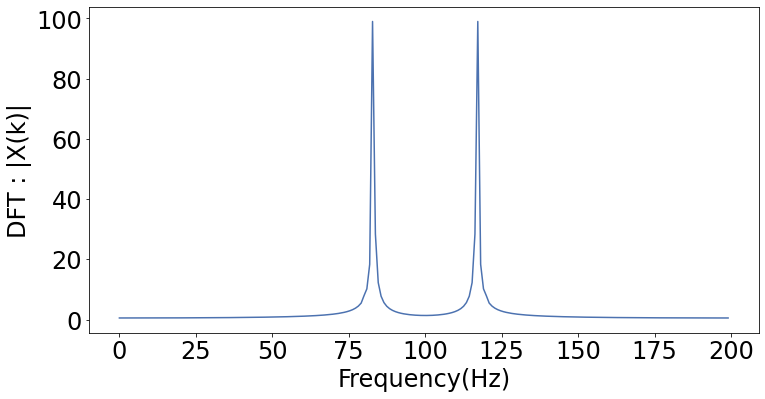

In [69]:
#Problem 2
A=160;B=166;Fs=200
def func(n):
    n=np.linspace(0,n-1,num=n)
    xn=0.1*np.sin(A*np.pi*n/Fs)+np.cos(B*np.pi*n/Fs)
    return xn

def DFT(xn):
    N = len(xn)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, xn)
    return X

def fplot(X1):
    N1 = len(X1)
    n1 = np.arange(N1)
    T1 = N1/Fs
    freq1 = n1/T1 
    plt.plot(freq1, abs(X1))#'g',markerfmt='go')
    X_peaks=sp.find_peaks(abs(X1),height=5)
    A1=freq1[X_peaks[0]]
    print(A1)
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('DFT : |X(k)|')
    plt.show()

def fplot1(X1):
    N1 = len(X1)
    n1 = np.arange(N1)
    T1 = N1/Fs
    freq1 = n1/T1 
    plt.stem(freq1, abs(X1),'g',markerfmt='go')
    X_peaks=sp.find_peaks(abs(X1),height=5)
    A1=freqa[X_peaks[0]]
    print(A1)
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('DFT : |X(k)|')
    plt.show()

xn1=func(215)
X1=DFT(xn1)
fplot(X1)





[ 80.          82.89156627 117.10843373 120.        ]


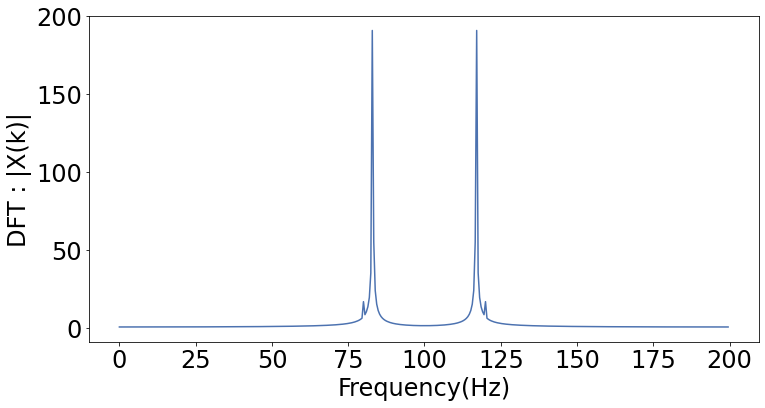

In [70]:
xn1=func(415)
X1=DFT(xn1)
fplot(X1)


[ 80.          83.04932735 116.95067265 120.        ]


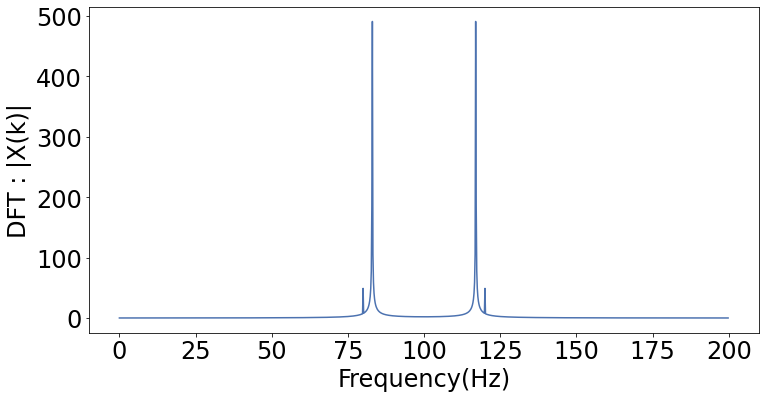

In [71]:
xn1=func(1115)
X1=DFT(xn1)
fplot(X1)


[ 80.          83.03630363 116.96369637 120.        ]


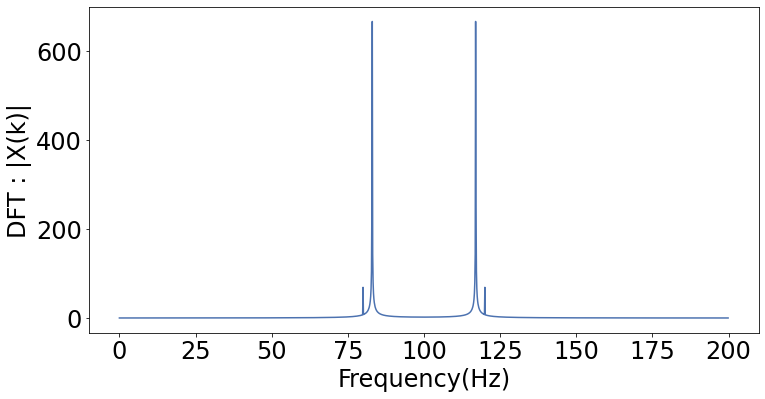

In [72]:
xn1=func(1515)
X1=DFT(xn1)
fplot(X1)


[ 80.          83.02872063 116.97127937 120.        ]


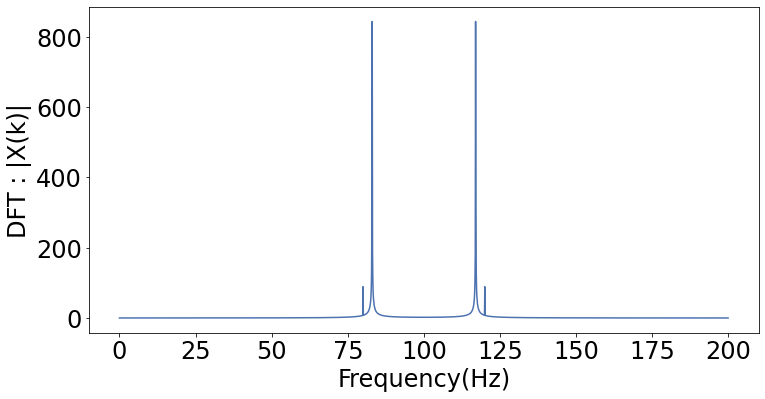

In [73]:
xn1=func(1915)
X1=DFT(xn1)
fplot(X1)


[ 82.79069767 117.20930233]


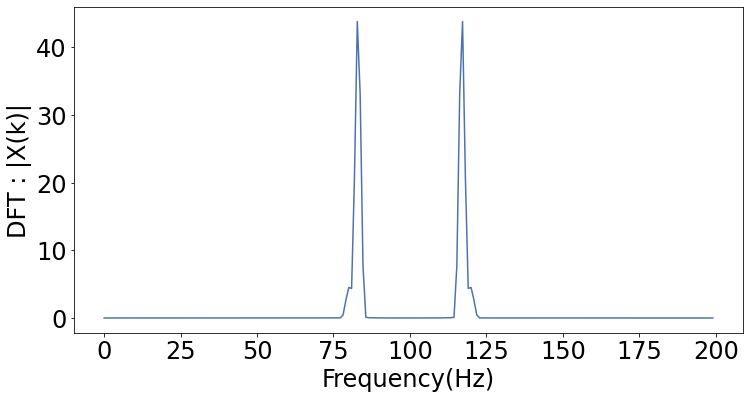

In [74]:
#Problem 3
A=160;B=166;Fs=200
def func1(n):
    n=np.linspace(0,n-1,num=n)
    xn=0.1*np.sin(A*np.pi*n/Fs)+np.cos(B*np.pi*n/Fs)
    window= np.blackman(215)
    xn=xn*window
    return xn

xn1=func1(215)
X1=DFT(xn1)
fplot(X1)


[ 80.          82.89156627 117.10843373 120.        ]


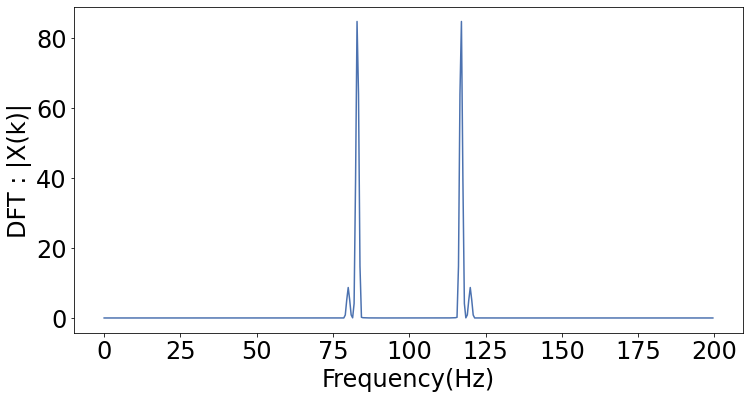

In [75]:
def func1(n):
    n=np.linspace(0,n-1,num=n)
    xn=0.1*np.sin(A*np.pi*n/Fs)+np.cos(B*np.pi*n/Fs)
    window= np.blackman(415)
    xn=xn*window
    return xn

xn1=func1(415)
X1=DFT(xn1)
fplot(X1)

[ 80.          83.04932735 116.95067265 120.        ]


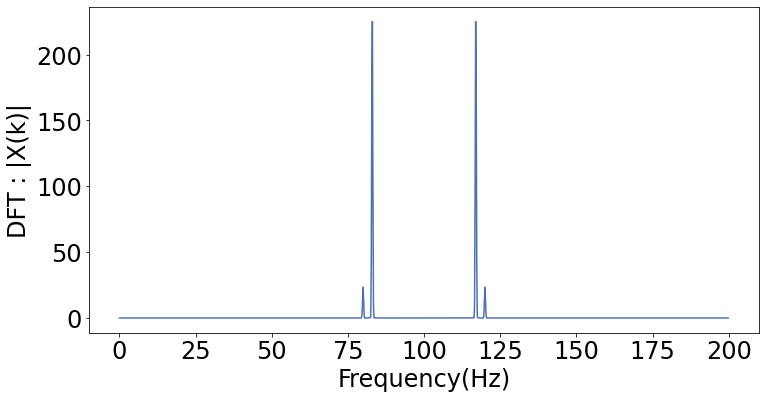

In [76]:
def func1(n):
    n=np.linspace(0,n-1,num=n)
    xn=0.1*np.sin(A*np.pi*n/Fs)+np.cos(B*np.pi*n/Fs)
    window= np.blackman(1115)
    xn=xn*window
    return xn

xn1=func1(1115)
X1=DFT(xn1)
fplot(X1)

[ 80.          83.03630363 116.96369637 120.        ]


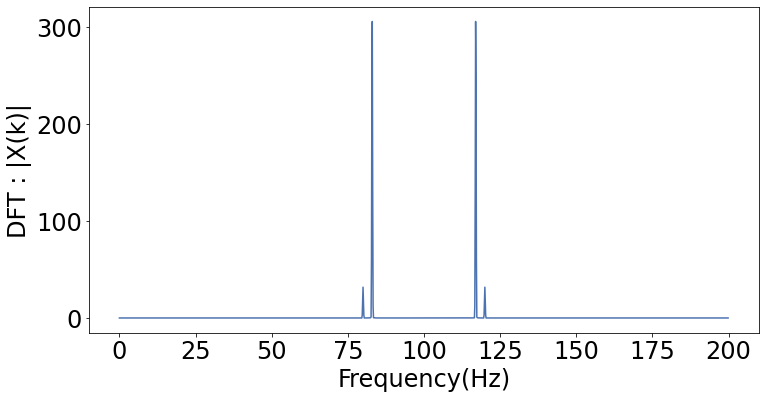

In [77]:
def func1(n):
    n=np.linspace(0,n-1,num=n)
    xn=0.1*np.sin(A*np.pi*n/Fs)+np.cos(B*np.pi*n/Fs)
    window= np.blackman(1515)
    xn=xn*window
    return xn

xn1=func1(1515)
X1=DFT(xn1)
fplot(X1)

[ 80.          83.02872063 116.97127937 120.        ]


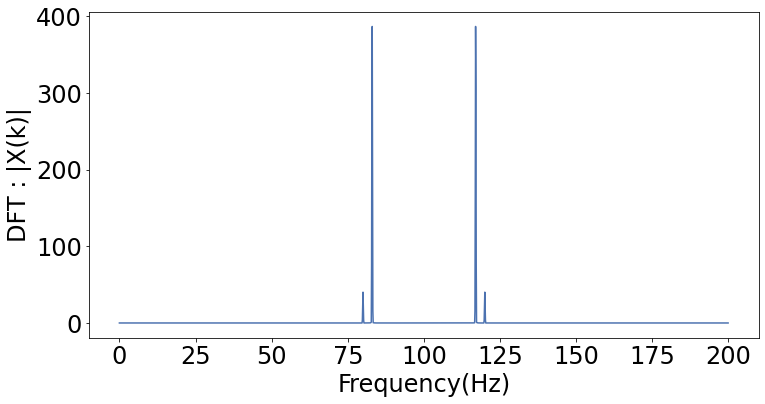

In [78]:
def func1(n):
    n=np.linspace(0,n-1,num=n)
    xn=0.1*np.sin(A*np.pi*n/Fs)+np.cos(B*np.pi*n/Fs)
    window= np.blackman(1915)
    xn=xn*window
    return xn

xn1=func1(1915)
X1=DFT(xn1)
fplot(X1)

[154. 158. 342. 346.]


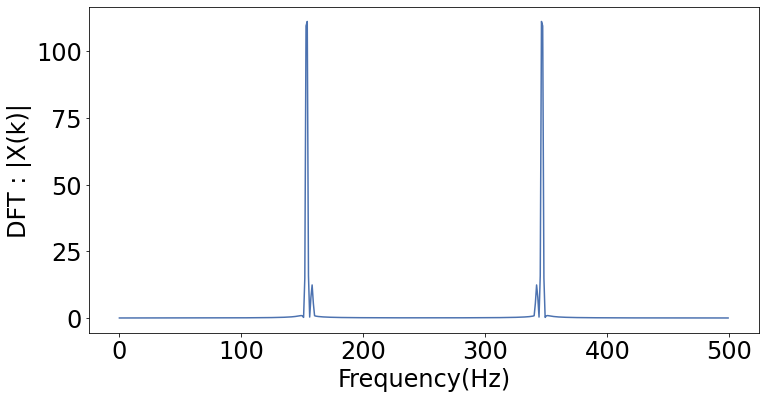

In [66]:
#Problem 4

#Part-1
Fs=500
def fplot2(Xa):
    Na = len(Xa)
    na = np.arange(Na)
    Ta = Na/Fs
    freqa = na/Ta 
    plt.plot(freqa, abs(Xa))#'g',markerfmt='go')
    X_peaks=sp.find_peaks(abs(Xa),height=5)
    A1=freqa[X_peaks[0]]
    print(A1)
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('DFT : |X(k)|')
    plt.show()

a=np.loadtxt('Exp4Data3.txt',delimiter=',')
window=np.hamming(500)
a=a*window
Y=DFT(a)
fplot2(Y)

[154. 159. 341. 346.]


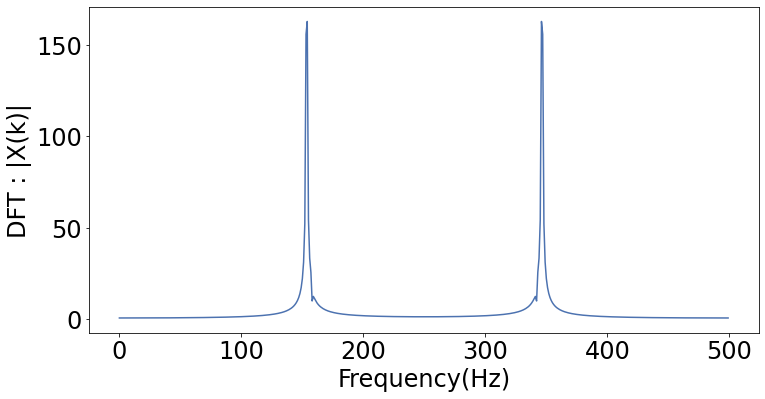

In [68]:
#Problem 4
#Part-2

a=np.loadtxt('Exp4Data3.txt',delimiter=',')
Y=DFT(a)
fplot2(Y)